In [26]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PARENT_DIR = os.path.dirname(os.getcwd())

### Análisis de Calidad de los datos

In [133]:
# Read Files
list_of_files = glob.glob(f'{PARENT_DIR}/data/data_raw/*.DAT')

dfs = {}
for f in list_of_files:
    # Name Df
    name_df = f.split('\\')[-1].split('.')[0].lower()
    dfs[name_df] = pd.read_csv(f, sep='|', encoding='latin')

#### Dataset Clientes

In [6]:
# View Quick of data
print(f"Dimensiones Clientes: {dfs['clientes'].shape}")

# Top 5
dfs['clientes'].head(5)

Dimensiones Clientes: (10000, 5)


,NEW_BP,DEPARTAMENTO,MUNICIPIO,CIUDAD,BARRIO_CASERIO
0,1572279576,FRANCISCO MORAZAN,DISTRITO CENTRAL,DISTRITO CENTRAL,COLONIA PAYAQUI
1,1580361774,ATLANTIDA,LA CEIBA,LA CEIBA,COLONIA SUYAPA
2,1572279695,FRANCISCO MORAZAN,DISTRITO CENTRAL,DISTRITO CENTRAL,RES ALTOS DE MIRAFLORES SUR
3,1572900603,CHOLUTECA,CHOLUTECA,CHOLUTECA,BARRIO LA LIBERTAD
4,1572280938,CORTES,SAN PEDRO SULA,SAN PEDRO SULA,COLONIA RANCHO EL COCO


In [8]:
print(f"Número de clientes Únicos: {len(dfs['clientes']['NEW_BP'].unique())}\n")

# Info Clientes
dfs['clientes'].info()

Número de clientes Únicos: 10000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NEW_BP          10000 non-null  int64 
 1   DEPARTAMENTO    10000 non-null  object
 2   MUNICIPIO       10000 non-null  object
 3   CIUDAD          10000 non-null  object
 4   BARRIO_CASERIO  10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [9]:
# Variables Categoricas
def distribution_variable(df:pd.DataFrame, variable_selected:str):
    """Identify Distribution"""
    df_aux = df.copy()

    # Calculate Dbn
    df_count = df_aux[variable_selected].value_counts().reset_index()

    # View Dbn
    df_count['category_part'] = round(df_count['count'] / df_count['count'].sum(), 4)

    return df_count

In [10]:
# Ver Departamento
dptos = distribution_variable(dfs['clientes'], 'DEPARTAMENTO')

print(f'Dbn Acumulada Top 5: {dptos.head(5)["category_part"].sum()}')

dptos

Dbn Acumulada Top 5: 0.7392


,DEPARTAMENTO,count,category_part
0,FRANCISCO MORAZAN,3236,0.3236
1,CORTES,2321,0.2321
2,ATLANTIDA,857,0.0857
3,COMAYAGUA,520,0.0520
4,YORO,458,0.0458
5,COLON,431,0.0431
6,OLANCHO,405,0.0405
7,CHOLUTECA,390,0.0390
8,EL PARAISO,261,0.0261
9,ISLAS DE LA BAHIA,244,0.0244


In [11]:
# Ver Municipio
df_var = distribution_variable(dfs['clientes'], 'MUNICIPIO')

print(f'Dbn Acumulada Top 5: {df_var.head(3)["category_part"].sum()}')

df_var

Dbn Acumulada Top 5: 0.5276


,MUNICIPIO,count,category_part
0,DISTRITO CENTRAL,3069,0.3069
1,SAN PEDRO SULA,1509,0.1509
2,LA CEIBA,698,0.0698
3,COMAYAGUA,288,0.0288
4,CHOLUTECA,279,0.0279
...,...,...,...
209,CHOLOMA CORTES,1,0.0001
210,LA LABOR,1,0.0001
211,SAN LUCAS,1,0.0001
212,IRIONA,1,0.0001


In [12]:
# Ver Ciudad
df_var = distribution_variable(dfs['clientes'], 'CIUDAD')

print(f'Dbn Acumulada Top 3: {df_var.head(5)["category_part"].sum():.4f}')

df_var

Dbn Acumulada Top 3: 0.5379


,CIUDAD,count,category_part
0,DISTRITO CENTRAL,2801,0.2801
1,SAN PEDRO SULA,1380,0.1380
2,LA CEIBA,680,0.0680
3,COMAYAGUA,270,0.0270
4,CHOLUTECA,248,0.0248
...,...,...,...
558,CHINDA,1,0.0001
559,PAVANA,1,0.0001
560,SAN ANTONIO DEL NORTE,1,0.0001
561,POLLYTILLY BIGHT,1,0.0001


In [14]:
# Revisar duplicados a nivel de todas las variables
dfs['clientes'][dfs['clientes'].duplicated()]

,NEW_BP,DEPARTAMENTO,MUNICIPIO,CIUDAD,BARRIO_CASERIO


##### Notas

1. No hay datos nulos o faltantes.
2. Cada usuario es único, no hay duplicados a nivel de usuarios; por tanto, no hay duplicados a nivel de todas las variables.
3. En general hay desbalance en los datos demográficos disponibles, categorías dominantes.

#### Dataset Activos

In [15]:
# View Quick of data
print(f"Dimensiones Activos: {dfs['activos'].shape}")

# Top 5
dfs['activos'].head(5)

Dimensiones Activos: (9657, 7)


,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
0,1580371185,0.00,53838.64,0.0,0.0,0.0,0.0
1,1571680230,162660.25,0.00,0.0,0.0,0.0,0.0
2,1580496033,68123.07,0.00,0.0,0.0,0.0,0.0
3,1572339970,211882.01,0.00,0.0,0.0,0.0,0.0
4,1579354793,0.00,17598.04,0.0,0.0,0.0,0.0


In [16]:
print(f"Número de clientes Únicos con Activos: {len(dfs['activos']['NEW_BP'].unique())}\n")

# Info Clientes
dfs['activos'].info()

Número de clientes Únicos con Activos: 9657

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NEW_BP             9657 non-null   int64  
 1   TC_MASTERCARD      9657 non-null   float64
 2   TC_VISA            9657 non-null   float64
 3   PRESTAMO_CONVENIO  9657 non-null   float64
 4   PRESTAMO_CONSUMO   9657 non-null   float64
 5   VIVIENDA           9657 non-null   float64
 6   VEHICULO           9657 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 528.2 KB


In [25]:
# ¿Qué usuarios no tienen clientes activos (productos de deuda)?
users_with_activos = set(dfs['activos']['NEW_BP'])
users_totales = set(dfs['clientes']['NEW_BP'])

# Usuarios que no tienen productos de deuda
user_wo_activos = len(users_totales.difference(users_with_activos))

print(f'{user_wo_activos} clientes no tienen ningún producto de deuda')

343 clientes no tienen ningún producto de deuda


##### **TC MASTERCARD**

In [99]:
variable_selected = 'TC_MASTERCARD'

users_with_pdt_selected = dfs['activos'][dfs['activos'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {(dif_users/dfs['clientes'].shape[0])*100}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {(users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100}% - users con el producto {variable_selected}")

4364, 43.64% - users sin el producto TC_MASTERCARD
5636, 56.36% - users con el producto TC_MASTERCARD


In [54]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
count,5.636000e+03,5636.00,5636.00,5636.00,5636.00,5636.00,5636.00
mean,1.574791e+09,52901.79,10932.09,37090.28,14297.90,30536.33,2438.65
std,3.710766e+06,84686.85,42191.04,107861.73,80014.58,236145.82,33839.93
min,1.571533e+09,0.24,0.00,0.00,0.00,0.00,0.00
25%,1.572009e+09,14240.39,0.00,0.00,0.00,0.00,0.00
50%,1.572500e+09,29673.32,0.00,0.00,0.00,0.00,0.00
75%,1.579153e+09,57917.95,0.00,0.00,0.00,0.00,0.00
max,1.583132e+09,1448565.51,920581.41,1021424.67,2480000.00,9163172.01,1179914.88


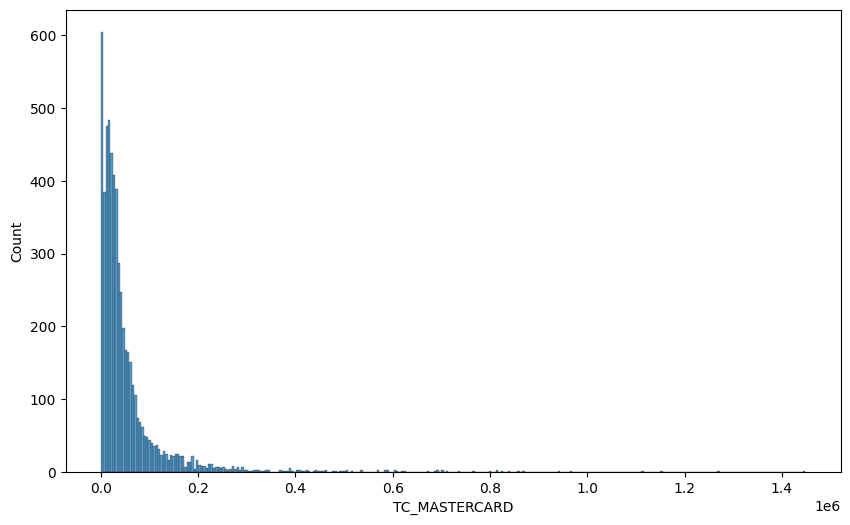

In [55]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected, x=variable_selected)
plt.show()

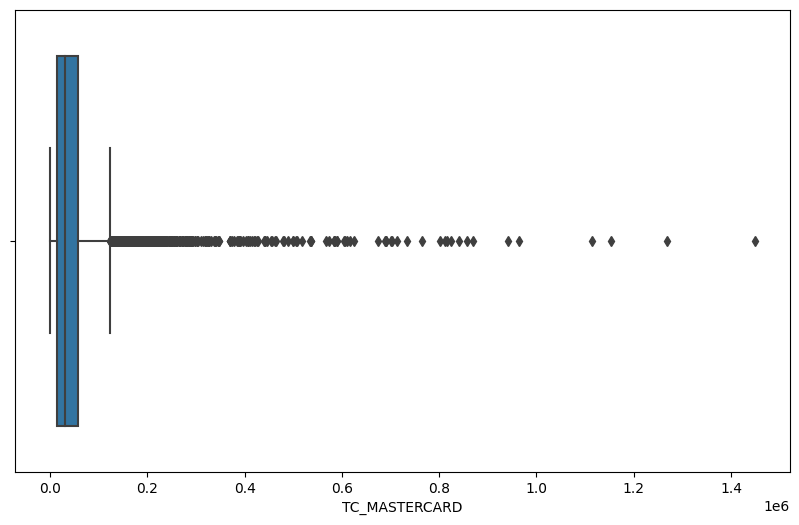

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### **TC VISA**

In [89]:
variable_selected = 'TC_VISA'

users_with_pdt_selected = dfs['activos'][dfs['activos'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {(users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100}% - users con el producto {variable_selected}")

5107, 51.07% - users sin el producto TC_VISA
4893, 48.93% - users con el producto TC_VISA


In [58]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
count,4.893000e+03,4893.00,4893.00,4893.00,4893.00,4893.00,4893.00
mean,1.575752e+09,11916.83,41095.06,45305.18,17002.69,28485.71,2608.14
std,3.966830e+06,45776.46,64321.69,113668.50,119662.99,196148.90,37965.08
min,1.571533e+09,0.00,1.80,0.00,0.00,0.00,0.00
25%,1.572229e+09,0.00,13204.11,0.00,0.00,0.00,0.00
50%,1.572905e+09,0.00,25044.43,0.00,0.00,0.00,0.00
75%,1.579904e+09,2474.45,43877.67,0.00,0.00,0.00,0.00
max,1.583132e+09,857697.48,1204767.91,1139378.59,6253441.09,3315647.29,1475206.63


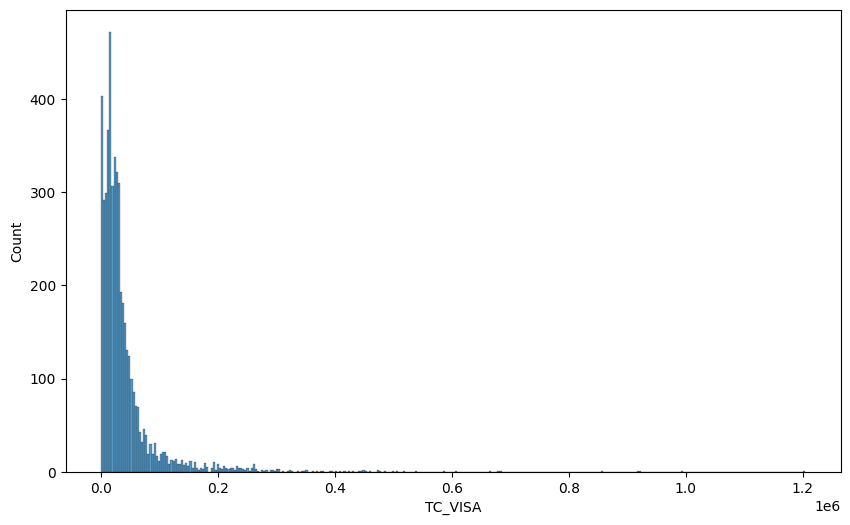

In [59]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected, x=variable_selected)
plt.show()

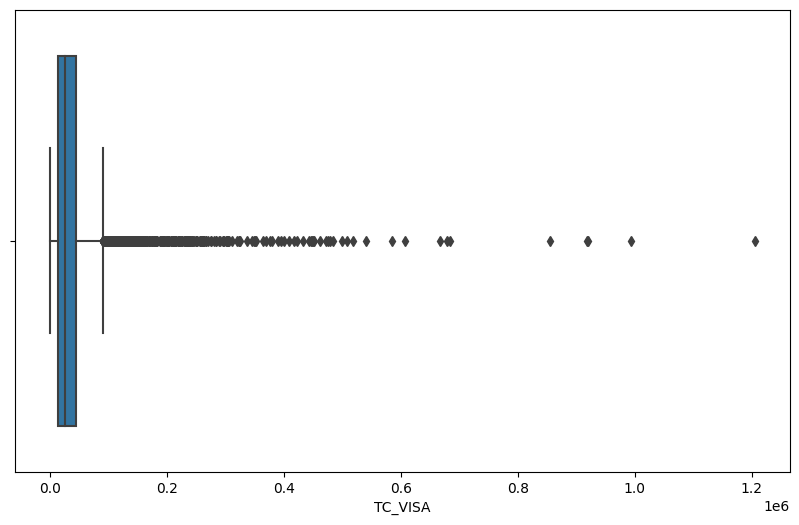

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### **PRESTAMO_CONVENIO**

In [90]:
variable_selected = 'PRESTAMO_CONVENIO'

users_with_pdt_selected = dfs['activos'][dfs['activos'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {(users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100}% - users con el producto {variable_selected}")

7979, 79.79% - users sin el producto PRESTAMO_CONVENIO
2021, 20.21% - users con el producto PRESTAMO_CONVENIO


In [62]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
count,2.021000e+03,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00
mean,1.575310e+09,17173.94,14345.26,217239.32,402.87,31427.69,1505.65
std,3.783589e+06,36655.37,25291.62,164816.57,6129.54,179905.86,22893.07
min,1.571535e+09,0.00,0.00,1766.33,0.00,0.00,0.00
25%,1.572278e+09,0.00,0.00,101539.30,0.00,0.00,0.00
50%,1.572743e+09,0.00,742.33,179799.26,0.00,0.00,0.00
75%,1.579373e+09,22091.49,22898.53,288079.55,0.00,0.00,0.00
max,1.582847e+09,588890.04,344531.59,1457832.32,165205.27,2883323.68,679709.14


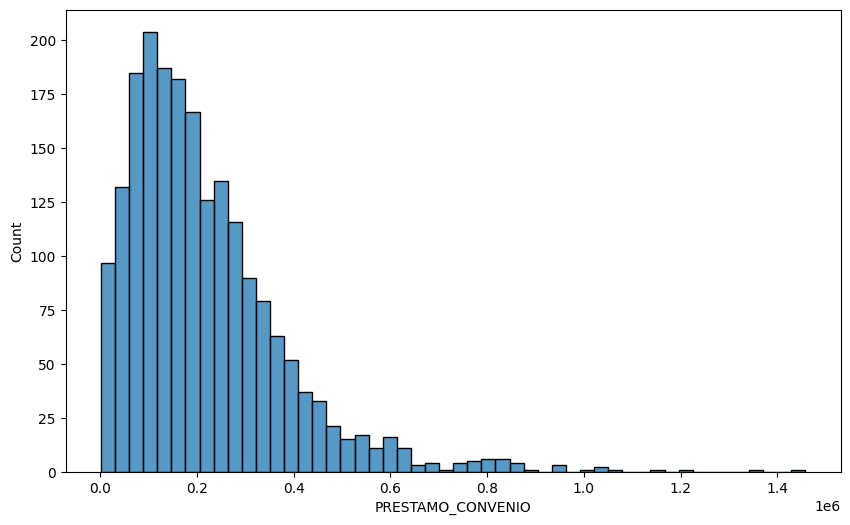

In [63]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected, x=variable_selected)
plt.show()

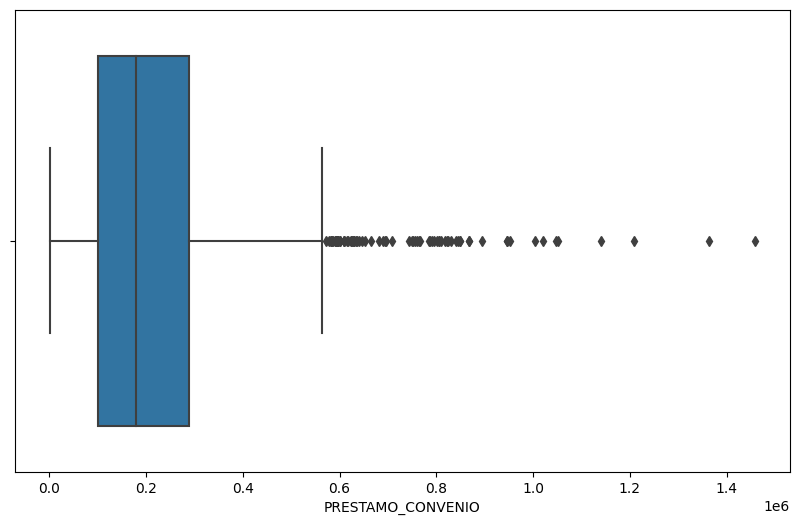

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### **PRESTAMO_CONSUMO**

In [92]:
variable_selected = 'PRESTAMO_CONSUMO'

users_with_pdt_selected = dfs['activos'][dfs['activos'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {((users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100):.2f}% - users con el producto {variable_selected}")

8880, 88.80% - users sin el producto PRESTAMO_CONSUMO
1120, 11.20% - users con el producto PRESTAMO_CONSUMO


In [67]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
count,1.120000e+03,1120.00,1120.00,1120.00,1120.00,1120.00,1120.00
mean,1.575484e+09,23522.52,17206.12,2783.52,156271.59,19526.39,765.11
std,3.836006e+06,48513.70,44579.49,34380.89,270062.04,153611.02,13708.00
min,1.571535e+09,0.00,0.00,0.00,13.31,0.00,0.00
25%,1.572158e+09,0.00,0.00,0.00,58307.58,0.00,0.00
50%,1.572800e+09,0.00,0.00,0.00,103926.00,0.00,0.00
75%,1.579464e+09,28979.09,22100.82,0.00,168052.04,0.00,0.00
max,1.582608e+09,609606.60,665983.92,810216.17,6253441.09,2599647.02,323299.11


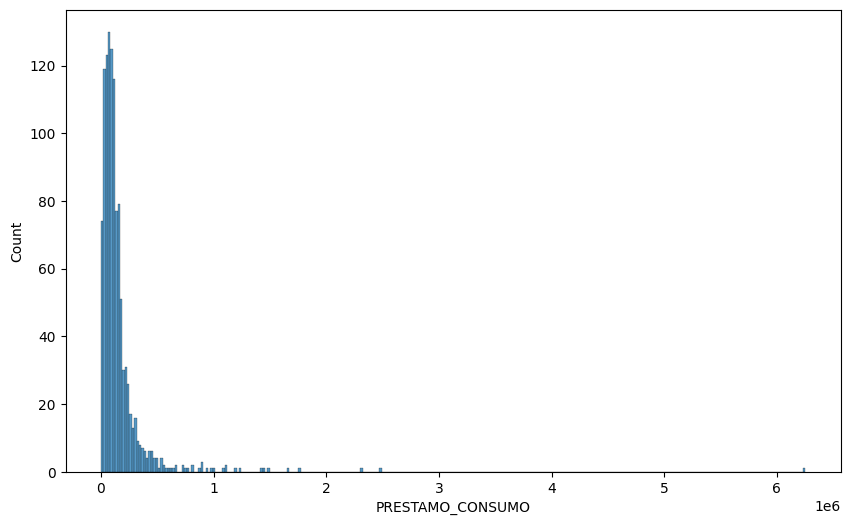

In [68]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected, x=variable_selected)
plt.show()

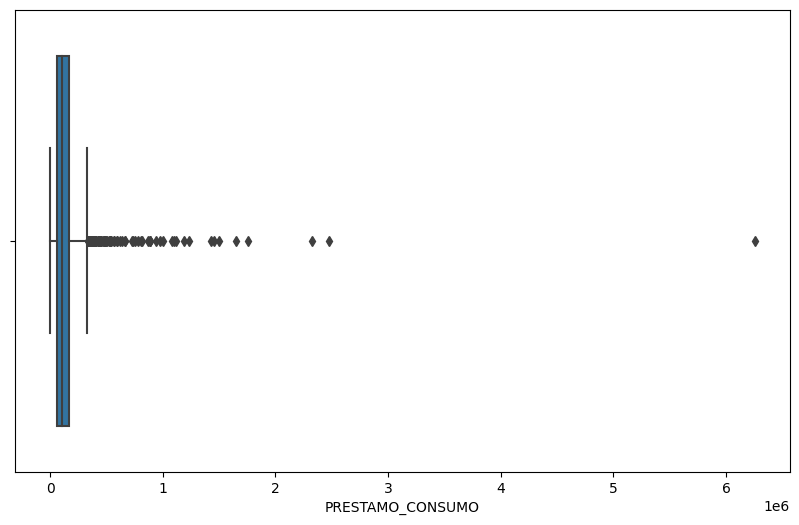

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### **VIVIENDA**

In [93]:
variable_selected = 'VIVIENDA'

users_with_pdt_selected = dfs['activos'][dfs['activos'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {((users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100):.2f}% - users con el producto {variable_selected}")

9597, 95.97% - users sin el producto VIVIENDA
403, 4.03% - users con el producto VIVIENDA


In [71]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
count,4.030000e+02,403.00,403.00,403.00,403.00,403.00,403.00
mean,1.573766e+09,23055.91,15452.76,57760.51,18371.17,837353.37,7298.45
std,3.124307e+06,49798.54,43293.99,137352.18,150978.62,784626.08,68444.40
min,1.571539e+09,0.00,0.00,0.00,0.00,1359.35,0.00
25%,1.572054e+09,0.00,0.00,0.00,0.00,352844.88,0.00
50%,1.572280e+09,1773.31,0.00,0.00,0.00,715371.04,0.00
75%,1.572885e+09,25547.18,16621.25,0.00,0.00,1088917.70,0.00
max,1.582323e+09,584433.80,475471.33,810216.17,2480000.00,9163172.01,793565.69


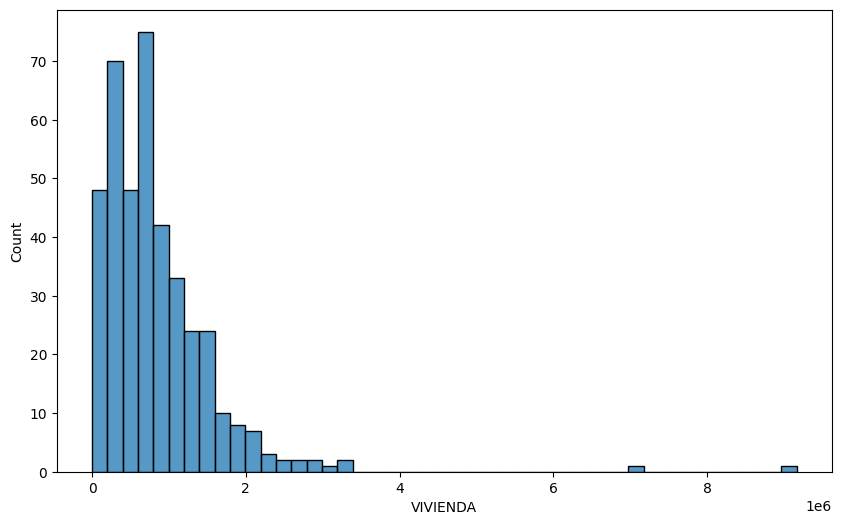

In [72]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected, x=variable_selected)
plt.show()

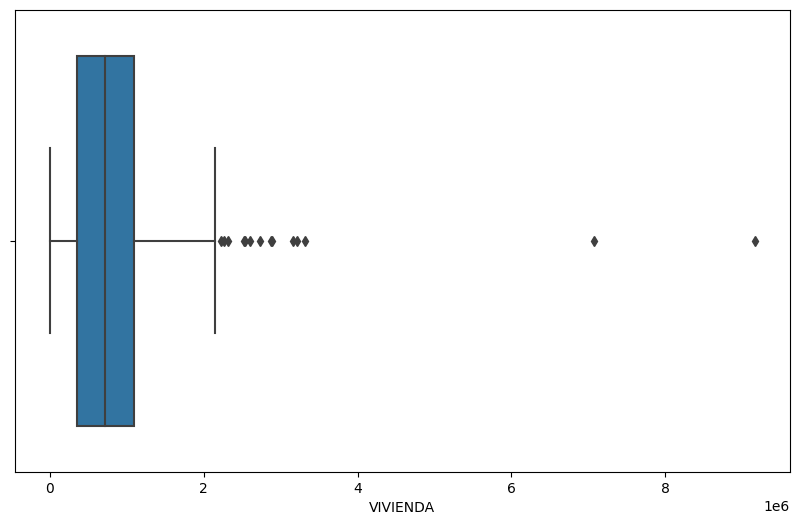

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### **VEHICULO**

In [94]:
variable_selected = 'VEHICULO'

users_with_pdt_selected = dfs['activos'][dfs['activos'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {((users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100):.2f}% - users con el producto {variable_selected}")

9887, 98.87% - users sin el producto VEHICULO
113, 1.13% - users con el producto VEHICULO


In [76]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO
count,1.130000e+02,113.00,113.00,113.00,113.00,113.00,113.00
mean,1.574507e+09,29286.85,16601.62,82618.94,12642.76,61383.27,258796.80
std,3.639987e+06,92252.88,82299.59,178578.64,81560.13,276754.62,257373.60
min,1.571537e+09,0.00,0.00,0.00,0.00,0.00,2508.10
25%,1.571938e+09,0.00,0.00,0.00,0.00,0.00,51508.39
50%,1.572448e+09,0.00,0.00,0.00,0.00,0.00,202934.22
75%,1.578465e+09,22114.23,12557.53,43326.69,0.00,0.00,367137.70
max,1.582552e+09,857697.48,855590.30,840000.00,725768.97,1804534.83,1475206.63


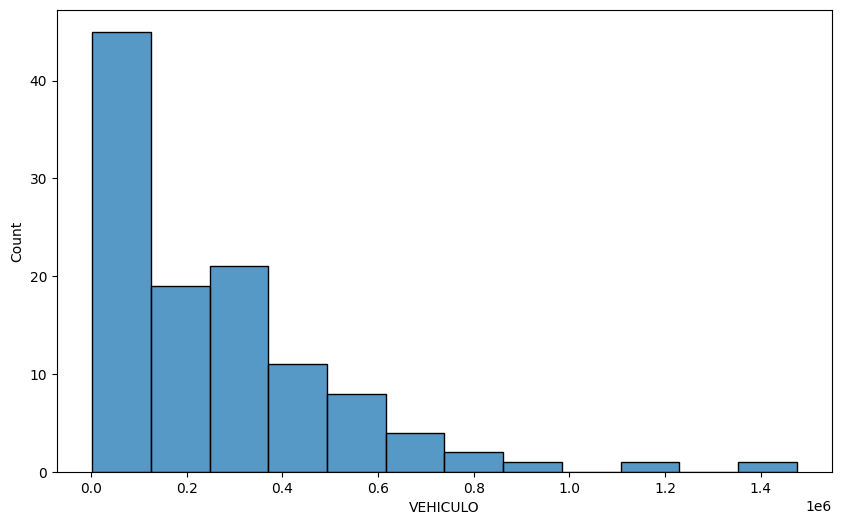

In [77]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected, x=variable_selected)
plt.show()

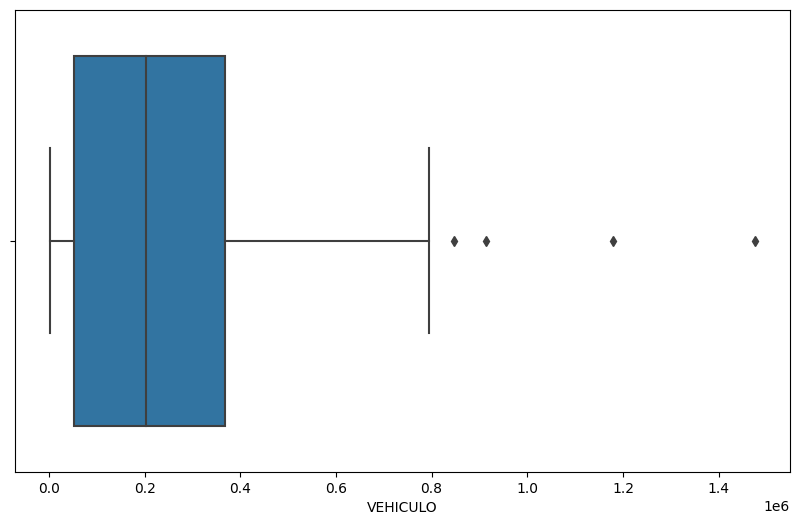

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### Notas

1. No hay datos nulos o faltantes.
2. Cada usuario es único, no hay duplicados a nivel de usuarios; por tanto, no hay duplicados a nivel de todas las variables.
3. En general, cada dataset tiene valores atípicos a nivel de los productos, para aquellos usuarios que tienen el producto.
4. Los productos con mayor cobertura son TC MASTERCARD y TC VISA; productos como VEHICULO, VIVIENDA, PRESTAMO_CONSUMO y PRESTAMO_VIVIENDA tienen baja cobertura:

- 4364, 43.64% - users sin el producto TC_MASTERCARD  
- 5636, 56.36% - users con el producto TC_MASTERCARD

&nbsp;

- 5107, 51.07% - users sin el producto TC_VISA  
- 4893, 48.93% - users con el producto TC_VISA

&nbsp;

- 7979, 79.79% - users sin el producto PRESTAMO_CONVENIO  
- 2021, 20.21% - users con el producto PRESTAMO_CONVENIO

&nbsp;

- 8880, 88.80% - users sin el producto PRESTAMO_CONSUMO  
- 1120, 11.20% - users con el producto PRESTAMO_CONSUMO

&nbsp;

- 9597, 95.97% - users sin el producto VIVIENDA  
- 403, 4.03% - users con el producto VIVIENDA

&nbsp;

- 9887, 98.87% - users sin el producto VEHICULO  
- 113, 1.13% - users con el producto VEHICULO


#### Dataset Pasivos

In [95]:
# View Quick of data
print(f"Dimensiones Pasivos: {dfs['pasivo'].shape}")

# Top 5
dfs['pasivo'].head(5)

Dimensiones Pasivos: (10000, 4)


,NEW_BP,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
0,1572279576,262665.61,2.029991e+05,39687918.5
1,1580361774,0.00,2.516300e+03,0.0
2,1572279695,66479.50,3.037106e+04,1700000.0
3,1572900603,0.00,1.534159e+01,0.0
4,1572280938,125122.14,3.151919e+06,25557569.5


In [96]:
print(f"Número de clientes Únicos con Pasivos: {len(dfs['pasivo']['NEW_BP'].unique())}\n")

# Info Clientes
dfs['pasivo'].info()

Número de clientes Únicos con Pasivos: 10000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NEW_BP        10000 non-null  int64  
 1   SALDO_CHEQUE  10000 non-null  float64
 2   SALDO_AHORRO  10000 non-null  float64
 3   SALDO_CDP     10000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


In [98]:
# ¿Qué usuarios no tienen pasivos (productos de ahorro)?
users_with_pasivo = set(dfs['pasivo']['NEW_BP'])
users_totales = set(dfs['clientes']['NEW_BP'])

# Usuarios que no tienen productos de ahorro
user_wo_pasivo = len(users_totales.difference(users_with_pasivo))

print(f'{user_wo_pasivo} clientes no tienen ningún producto de ahorro')

0 clientes no tienen ningún producto de ahorro


##### **SALDO CHEQUE**

In [179]:
variable_selected = 'SALDO_CHEQUE'

users_with_pdt_selected = dfs['pasivo'][dfs['pasivo'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {((users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100):.2f}% - users con el producto {variable_selected}")

6197, 61.97% - users sin el producto SALDO_CHEQUE
3803, 38.03% - users con el producto SALDO_CHEQUE


In [180]:
# Describe Quickly
round(users_with_pdt_selected.describe(), 2)

,NEW_BP,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
count,3.803000e+03,3803.00,3803.00,3803.00
mean,1.575053e+09,11969.55,38914.14,49929.82
std,3.701346e+06,85163.56,202875.35,959156.58
min,1.571533e+09,0.01,0.00,0.00
25%,1.572193e+09,26.12,0.02,0.00
50%,1.572633e+09,485.85,253.51,0.00
75%,1.579284e+09,7483.38,11623.20,0.00
max,1.582847e+09,3571292.96,6082008.68,39687918.50


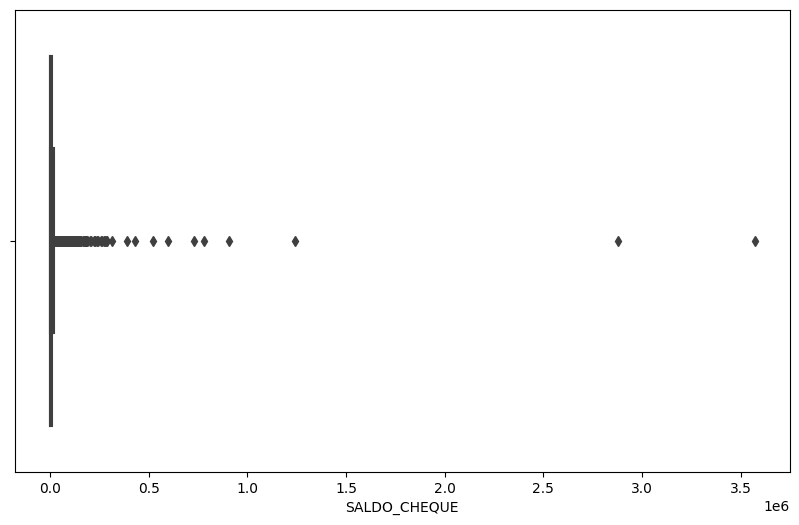

In [181]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

In [184]:
users_with_pdt_selected[users_with_pdt_selected['SALDO_CHEQUE'] > 25]

,NEW_BP,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
0,1572279576,262665.61,2.029991e+05,39687918.5
1,1572279695,66479.50,3.037106e+04,1700000.0
2,1572280938,125122.14,3.151919e+06,25557569.5
3,1572279338,32254.18,5.489962e+04,0.0
4,1572280115,88.39,2.419382e+04,0.0
...,...,...,...,...
3796,1573044324,9666.81,0.000000e+00,0.0
3797,1572224843,40.39,4.590000e+00,0.0
3798,1578562754,35.18,0.000000e+00,0.0
3800,1572227528,39.11,7.012720e+03,0.0


In [187]:
round(users_with_pdt_selected[users_with_pdt_selected['SALDO_CHEQUE'] > 25].describe(percentiles=[.1, .2, .25, .5, .75, .90, .99]), 2)

,NEW_BP,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
count,2.866000e+03,2866.00,2866.00,2866.00
mean,1.575021e+09,15880.95,44749.59,65408.07
std,3.702890e+06,97789.36,227214.51,1104278.62
min,1.571533e+09,25.20,0.00,0.00
10%,1.571730e+09,45.53,0.00,0.00
20%,1.572028e+09,83.35,0.00,0.00
25%,1.572184e+09,112.29,0.00,0.00
50%,1.572607e+09,2912.50,279.08,0.00
75%,1.579261e+09,11080.35,13709.63,0.00
90%,1.580522e+09,28140.75,87590.59,0.00


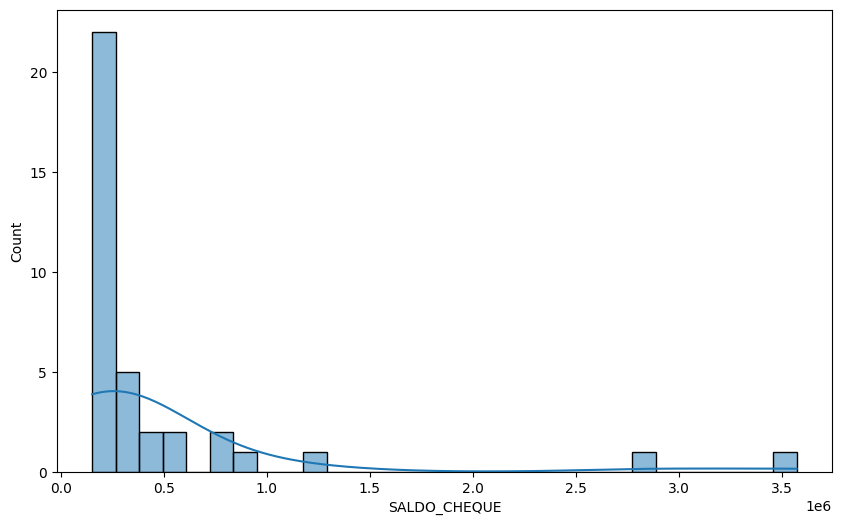

In [198]:
plt.figure(figsize=(10, 6))
sns.histplot(users_with_pdt_selected[users_with_pdt_selected['SALDO_CHEQUE'] > 150000], x=variable_selected, kde=True, bins=30)
plt.show()

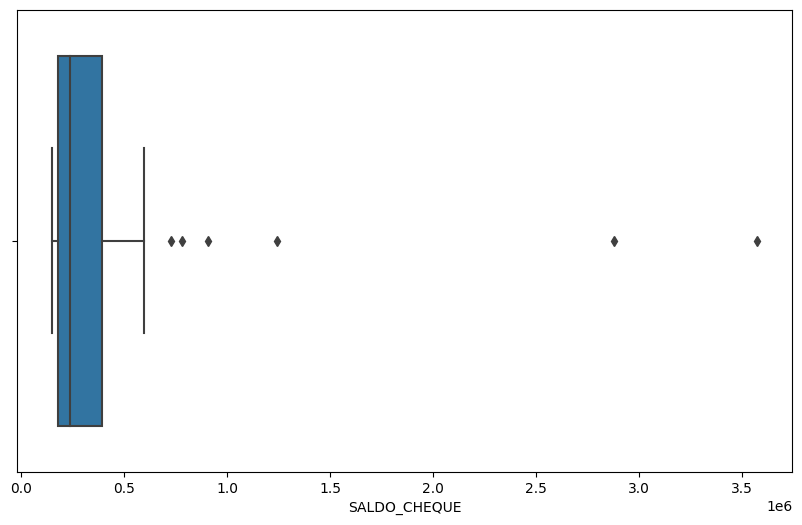

In [199]:
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected[users_with_pdt_selected['SALDO_CHEQUE'] > 150000], x=variable_selected)
plt.show()

##### **SALDO AHORRO**

In [119]:
variable_selected = 'SALDO_AHORRO'

users_with_pdt_selected = dfs['pasivo'][dfs['pasivo'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {((users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100):.2f}% - users con el producto {variable_selected}")

1229, 12.29% - users sin el producto SALDO_AHORRO
8771, 87.71% - users con el producto SALDO_AHORRO


In [177]:
# Describe Quickly
round(users_with_pdt_selected.describe(percentiles=[.1, .25, .5, .75, .80, .9, .99]), 2)

,NEW_BP,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
count,3.150000e+02,315.00,315.00,315.00
mean,1.573122e+09,19681.48,225075.35,1229453.55
std,2.728423e+06,170340.29,507796.71,3668390.86
min,1.571533e+09,0.00,0.00,5000.00
10%,1.571627e+09,0.00,757.72,25000.00
25%,1.571707e+09,0.00,8002.55,92000.00
50%,1.572134e+09,0.00,50377.09,247445.00
75%,1.572594e+09,82.67,217202.95,907500.00
80%,1.572784e+09,705.93,308172.66,1259445.00
90%,1.578920e+09,10100.09,619906.66,2291200.00


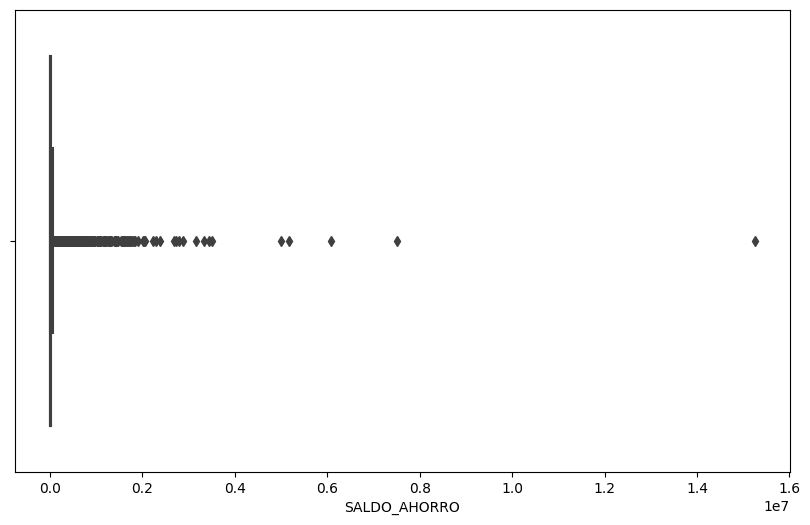

In [121]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### **SALDO CDP**

In [122]:
variable_selected = 'SALDO_CDP'

users_with_pdt_selected = dfs['pasivo'][dfs['pasivo'][variable_selected] > 0].reset_index(drop=True)
users_with_pdt_selected[variable_selected] = round(users_with_pdt_selected[variable_selected], 2)

dif_users = dfs['clientes'].shape[0] - users_with_pdt_selected.shape[0]
print(f"{dif_users}, {((dif_users/dfs['clientes'].shape[0])*100):.2f}% - users sin el producto {variable_selected}")
print(f"{users_with_pdt_selected.shape[0]}, {((users_with_pdt_selected.shape[0]/dfs['clientes'].shape[0])*100):.2f}% - users con el producto {variable_selected}")

9685, 96.85% - users sin el producto SALDO_CDP
315, 3.15% - users con el producto SALDO_CDP


In [178]:
# Describe Quickly
round(users_with_pdt_selected.describe(percentiles=[.1, .25, .5, .75, .80, .9, .99]), 2)

,NEW_BP,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
count,3.150000e+02,315.00,315.00,315.00
mean,1.573122e+09,19681.48,225075.35,1229453.55
std,2.728423e+06,170340.29,507796.71,3668390.86
min,1.571533e+09,0.00,0.00,5000.00
10%,1.571627e+09,0.00,757.72,25000.00
25%,1.571707e+09,0.00,8002.55,92000.00
50%,1.572134e+09,0.00,50377.09,247445.00
75%,1.572594e+09,82.67,217202.95,907500.00
80%,1.572784e+09,705.93,308172.66,1259445.00
90%,1.578920e+09,10100.09,619906.66,2291200.00


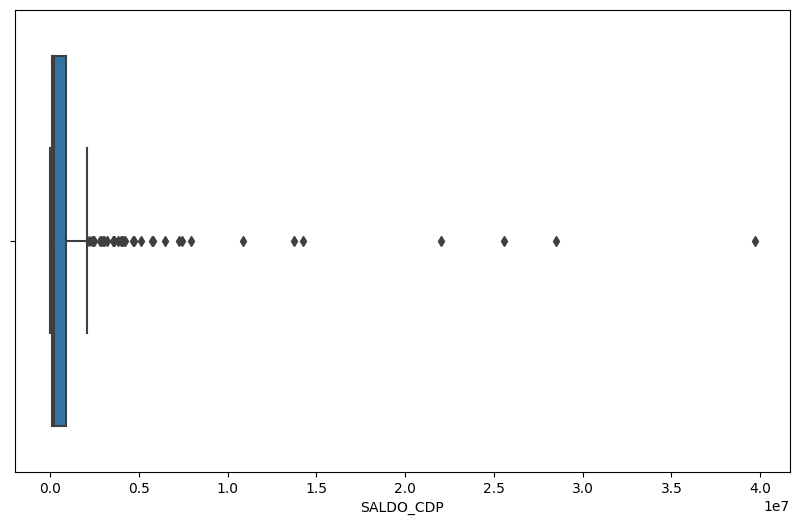

In [124]:
# Selected Variable
plt.figure(figsize=(10, 6))
sns.boxplot(users_with_pdt_selected, x=variable_selected)
plt.show()

##### Notas

1. No hay datos nulos o faltantes.
2. Cada usuario es único, no hay duplicados a nivel de usuarios; por tanto, no hay duplicados a nivel de todas las variables.
3. En general, cada dataset tiene valores atípicos a nivel de los productos, para aquellos usuarios que tienen el producto.
4. El producto con mayor cobertura es la cuenta de ahorros (87.7% de los usuarios la tienen), seguido x el saldo en cheques (38%) y finalmente, con un % mínimo el saldo en cdp (3.15%)


#### Dataset Remesas

In [125]:
# View Quick of data
print(f"Dimensiones Pasivos: {dfs['remesas'].shape}")

# Top 5
dfs['remesas'].head(5)

Dimensiones Pasivos: (35410, 4)


,NEW_BP,MONTO_LPS,FECHA_TRANSACCION,CANAL
0,1571954824,5711.00,2024-06-21,CREDITO CUENTA
1,1579264436,2591.84,2024-05-01,CREDITO CUENTA
2,1579264436,1086.54,2024-05-08,CREDITO CUENTA
3,1579264436,1037.27,2024-05-10,CREDITO CUENTA
4,1579264436,1234.83,2024-05-15,CREDITO CUENTA


In [152]:
print(f"Número de clientes Únicos con Remesas: {len(dfs['remesas']['NEW_BP'].unique())}")
print(f"El {(len(dfs['remesas']['NEW_BP'].unique()) / dfs['clientes'].shape[0]) * 100}% de los usuarios reciben remesas\n")

# Info Clientes
dfs['remesas'].info()

Número de clientes Únicos con Remesas: 3543
El 35.43% de los usuarios reciben remesas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35410 entries, 0 to 35409
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NEW_BP             35410 non-null  int64  
 1   MONTO_LPS          35410 non-null  float64
 2   FECHA_TRANSACCION  35410 non-null  object 
 3   CANAL              35410 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


##### **CANAL**

In [128]:
dfs['remesas']['CANAL'].value_counts() # Las remesas disponibles se hicieron x el mismo canal CREDITO CUENTA (100%)

CANAL
CREDITO CUENTA    35410
Name: count, dtype: int64

**Remesas A lo largo del tiempo - Diario**

In [134]:
df_remesas_copy = dfs['remesas'].copy()

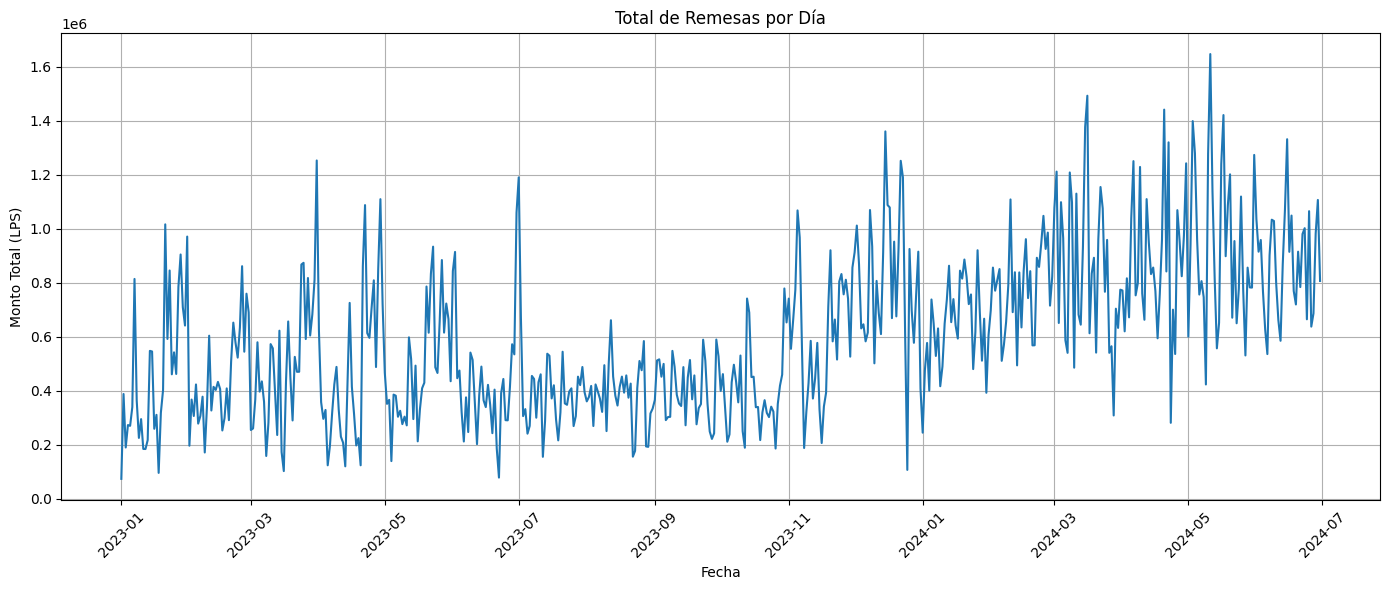

In [135]:
# Convertir la columna FECHA_TRANSACCION a tipo datetime
df_remesas_copy['FECHA_TRANSACCION'] = pd.to_datetime(df_remesas_copy['FECHA_TRANSACCION'])
df_remesas_copy['MONTH_TRANSACCION'] = df_remesas_copy['FECHA_TRANSACCION'].dt.strftime('%Y-%m')

# Agrupar los datos por fecha y sumar los montos
df_grouped = df_remesas_copy.groupby('FECHA_TRANSACCION')['MONTO_LPS'].sum().reset_index()

# Graficar los datos
plt.figure(figsize=(14, 6))
plt.plot(df_grouped['FECHA_TRANSACCION'], df_grouped['MONTO_LPS'])
plt.title('Total de Remesas por Día')
plt.xlabel('Fecha')
plt.ylabel('Monto Total (LPS)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

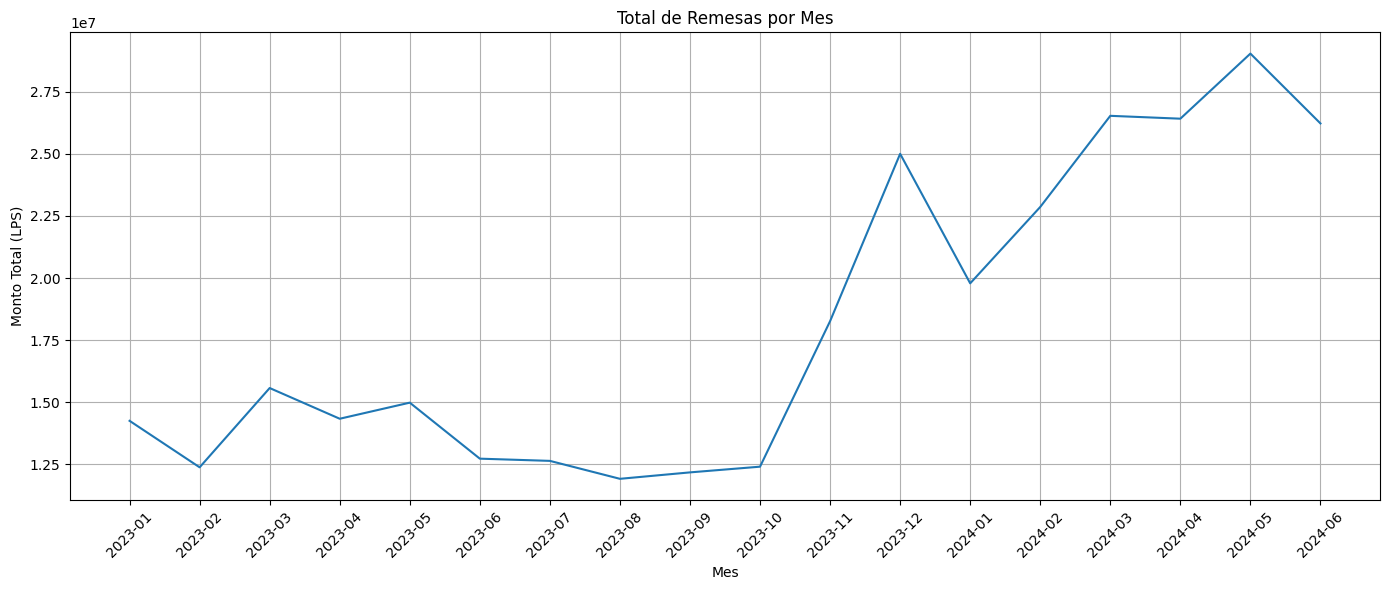

In [136]:
# Agrupar los datos por MES y sumar los montos
df_grouped = df_remesas_copy.groupby('MONTH_TRANSACCION')['MONTO_LPS'].sum().reset_index()

# Graficar los datos
plt.figure(figsize=(14, 6))
plt.plot(df_grouped['MONTH_TRANSACCION'], df_grouped['MONTO_LPS'])
plt.title('Total de Remesas por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Total (LPS)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### Cliente

In [144]:
df_clients_con_remesas = df_remesas_copy[['NEW_BP', 'MONTO_LPS']].groupby('NEW_BP').sum().reset_index().sort_values(by=['MONTO_LPS'], ascending=False)

df_clients_con_remesas['part_remesas_totales'] = (df_clients_con_remesas['MONTO_LPS'] / df_clients_con_remesas['MONTO_LPS'].sum()) * 100

df_clients_con_remesas

,NEW_BP,MONTO_LPS,part_remesas_totales
102,1571570916,2559260.42,0.781420
175,1571613504,2420633.19,0.739092
2580,1578855970,1897942.40,0.579499
1786,1572588324,1756438.26,0.536294
1912,1572719143,1684692.26,0.514387
...,...,...,...
903,1572113216,264.76,0.000081
2719,1579309955,247.00,0.000075
3087,1580159910,247.00,0.000075
1772,1572571347,246.90,0.000075


In [148]:
round(df_clients_con_remesas.describe(), 2)

,NEW_BP,MONTO_LPS,part_remesas_totales
count,3.543000e+03,3543.00,3543.00
mean,1.574872e+09,92439.81,0.03
std,3.677058e+06,182084.76,0.06
min,1.571533e+09,104.40,0.00
25%,1.572094e+09,6072.26,0.00
50%,1.572568e+09,25860.67,0.01
75%,1.579220e+09,97940.68,0.03
max,1.582609e+09,2559260.42,0.78


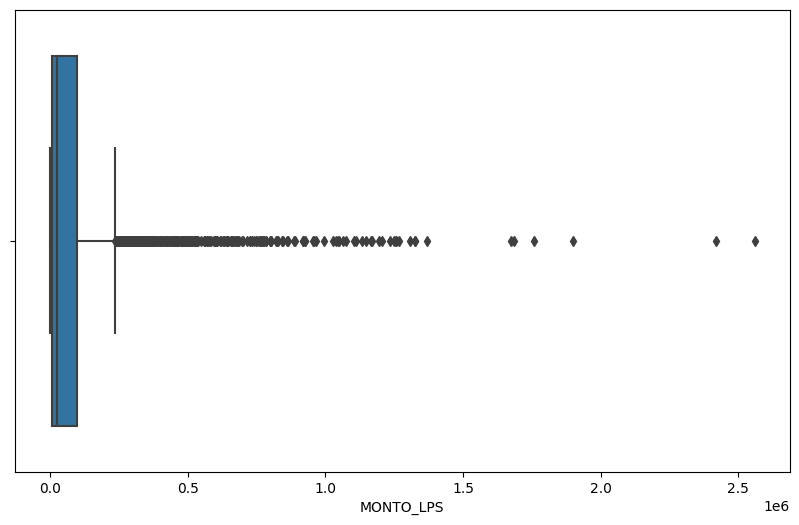

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_clients_con_remesas, x='MONTO_LPS')
plt.show()

**Medir Impacto**

In [155]:
remesas_after_202311 = df_remesas_copy[df_remesas_copy['MONTH_TRANSACCION'] >= '2023-11'].reset_index(drop=True)

In [156]:
remesas_after_202311_agg = remesas_after_202311[['NEW_BP', 'MONTO_LPS']].groupby('NEW_BP').sum().reset_index().sort_values(by=['MONTO_LPS'], ascending=False)

remesas_after_202311_agg['part_remesas_totales'] = (remesas_after_202311_agg['MONTO_LPS'] / remesas_after_202311_agg['MONTO_LPS'].sum()) * 100

remesas_after_202311_agg

,NEW_BP,MONTO_LPS,part_remesas_totales
1411,1572503419,1325894.13,0.683010
2012,1578010392,1324872.27,0.682484
86,1571570916,1319602.50,0.679769
2085,1578443669,1234268.54,0.635811
146,1571613504,1135804.01,0.585089
...,...,...,...
2287,1579309955,247.00,0.000127
2595,1580159910,247.00,0.000127
2062,1578343604,246.90,0.000127
1482,1572571347,246.90,0.000127


##### Notas

1. No hay datos nulos o faltantes.
2. El 35% de los usuarios disponibles, han recibido remesas.
3. Las remesas tuvieron un gran salto a finales de 2023 y se ha mantenido; hubo un incremento de casi el 100% en remesas percibidas.
4. El monto total percibido es de 25,860.67	LPS, no obstante, hay usuarios que se alejan considerablemente de la normalidad de las remesas percibidas


#### Dataset Transacciones

In [157]:
# Make copy
df_transacciones = dfs['transacciones'].copy()

In [160]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015450 entries, 0 to 1015449
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   NEW_BP             1015450 non-null  int64  
 1   FECHA_TRANSACCION  1015450 non-null  object 
 2   CANAL              1015450 non-null  object 
 3   MONTO_TRANSACCION  1015450 non-null  float64
 4   MONEDA             1015044 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.7+ MB


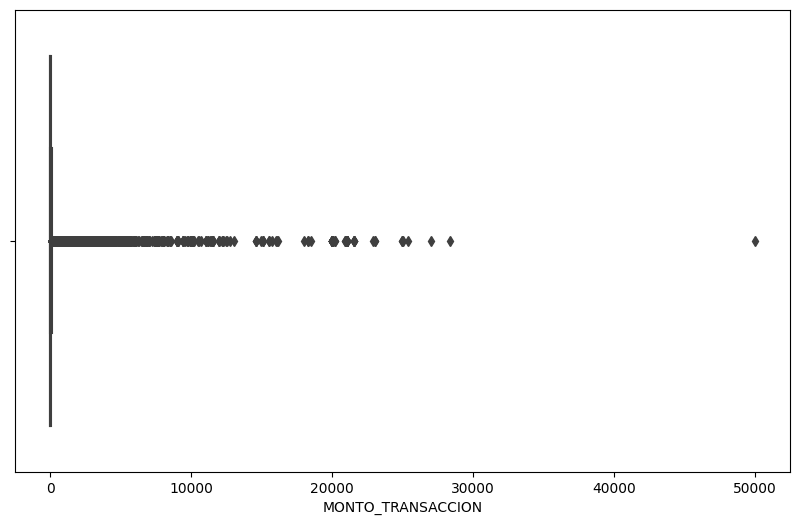

In [159]:
plt.figure(figsize=(10, 6))
df_ext = df_transacciones[df_transacciones['MONEDA'].isin(['USD', 'EUR'])].reset_index(drop=True)
sns.boxplot(df_ext, x='MONTO_TRANSACCION')
plt.show()

In [162]:
# Datos Faltantes
df_transacciones[df_transacciones['MONEDA'].isna()].shape

(406, 5)

In [163]:
df_transacciones[df_transacciones['MONEDA'].isna()]['FECHA_TRANSACCION'].unique()

array(['2024-03-02'], dtype=object)

In [164]:
df_transacciones[df_transacciones['MONEDA'].isna()]['CANAL'].unique()

array(['AGENTES BANCARIOS'], dtype=object)

In [199]:
df_transacciones[(df_transacciones['FECHA_TRANSACCION']=='2024-03-02') & (df_transacciones['CANAL']=='AGENTES BANCARIOS')][['MONEDA', 'MONTO_TRANSACCION']].fillna('SIN DATOS').groupby(by=['MONEDA']).describe()

MONTO_TRANSACCION                                             \
                      count          mean           std    min     25%   
MONEDA                                                                   
LPS                    54.0  10307.623519  13126.861255  100.0  1525.0   
SIN DATOS             406.0   4351.495788   5211.227581  100.0  1000.0   

                                      
               50%      75%      max  
MONEDA                                
LPS        5900.00  10000.0  53000.0  
SIN DATOS  2368.12   6500.0  50000.0

In [202]:
df_transacciones[(df_transacciones['CANAL']=='AGENTES BANCARIOS')][['MONEDA', 'MONTO_TRANSACCION']].fillna('SIN DATOS').groupby(by=['MONEDA']).describe()

MONTO_TRANSACCION                                            \
                      count         mean          std     min     25%   
MONEDA                                                                  
LPS                 51269.0  5220.361020  9907.516021    0.78  1000.0   
SIN DATOS             406.0  4351.495788  5211.227581  100.00  1000.0   

                                      
               50%     75%       max  
MONEDA                                
LPS        2700.00  7000.0  300000.0  
SIN DATOS  2368.12  6500.0   50000.0

In [204]:
# Llenado datos nulos:
#--> Los datos nulos del dataset de transacciones están centrados el 100% en la variable moneda
#--> Los datos nulos de la variable moneda están centrados el 100% en el canal 'AGENTES BANCARIOS'
#--> Los datos nulos de la variable moneda están centrados el 100% en la fecha '2024-03-02'
#--> De los datos disponibles, todas las transacciones que se hicieron el día 2024-03-02 x el canal AGENTES BANCARIOS, se hicieron en moneda LPS
#--> De los datos disponibles, todas las transacciones del histórico completo de datos que se hicieron x el canal AGENTES BANCARIOS, se hicieron en moneda LPS.

# Con base en lo anterior, tomando como referencia la moda a nivel de canal, día e histórico de datos, se decide llenar los datos nulos de moneda en el
# canal AGENTES BANCARIOS para el día 2024-03-02 con la moneda LPS.

dfs['transacciones']['MONEDA'] = dfs['transacciones']['MONEDA'].fillna('LPS')

In [224]:
exchange_mon = {
    'EUR': 26.5,
    'USD': 24.8,
    'LPS': 1
}

# LLevar todo a LPS
dfs['transacciones']['TASA_DE_CAMBIO'] = dfs['transacciones']['MONEDA'].map(exchange_mon)

# Add variable solo MONTO LPS
dfs['transacciones']['MONTO_TRANSACCION_LPS'] = round(dfs['transacciones']['MONTO_TRANSACCION'] * dfs['transacciones']['TASA_DE_CAMBIO'], 2)

In [165]:
dfs['transacciones']

,NEW_BP,FECHA_TRANSACCION,CANAL,MONTO_TRANSACCION,MONEDA
0,1581405319,2024-06-29,PUNTOS DE VENTA,127.66,LPS
1,1581405319,2024-06-29,PUNTOS DE VENTA,132.60,LPS
2,1581405319,2024-06-26,PUNTOS DE VENTA,1979.13,LPS
3,1581405319,2024-05-19,PUNTOS DE VENTA,317.00,LPS
4,1581405319,2024-05-01,PUNTOS DE VENTA,37.80,LPS
...,...,...,...,...,...
1015445,1572283562,2024-05-23,VENTANILLA,304.00,LPS
1015446,1572283562,2024-05-18,VENTANILLA,966.00,LPS
1015447,1572283562,2024-05-28,VENTANILLA,1289.00,LPS
1015448,1572283562,2024-06-08,VENTANILLA,1979.00,LPS


In [166]:
dfs['transacciones'][dfs['transacciones']['MONEDA'].isin(['USD', 'EUR'])].reset_index(drop=True)

,NEW_BP,FECHA_TRANSACCION,CANAL,MONTO_TRANSACCION,MONEDA
0,1581407171,2024-06-15,PUNTOS DE VENTA,1.99,USD
1,1581407171,2024-04-15,PUNTOS DE VENTA,1.99,USD
2,1581407171,2024-04-07,PUNTOS DE VENTA,4.99,USD
3,1581407171,2024-06-23,PUNTOS DE VENTA,7.99,USD
4,1581407171,2024-04-07,PUNTOS DE VENTA,1.99,USD
...,...,...,...,...,...
65883,1572283484,2024-06-17,PUNTOS DE VENTA,2.57,USD
65884,1572283484,2024-03-23,PUNTOS DE VENTA,62.00,USD
65885,1572283562,2024-03-27,PUNTOS DE VENTA,10.99,USD
65886,1572283562,2024-06-09,PUNTOS DE VENTA,10.99,USD


#### Agregar Data

In [170]:
df_clientes_con_ayp = dfs['clientes'].merge(dfs['activos'], how='left', on='NEW_BP').merge(dfs['pasivo'], how='left', on='NEW_BP').fillna(0)
df_clientes_con_ayp['SALDO_AHORRO'] = round(df_clientes_con_ayp['SALDO_AHORRO'] * 1, 2)

In [171]:
df_clientes_con_ayp

,NEW_BP,DEPARTAMENTO,MUNICIPIO,CIUDAD,BARRIO_CASERIO,TC_MASTERCARD,TC_VISA,PRESTAMO_CONVENIO,PRESTAMO_CONSUMO,VIVIENDA,VEHICULO,SALDO_CHEQUE,SALDO_AHORRO,SALDO_CDP
0,1572279576,FRANCISCO MORAZAN,DISTRITO CENTRAL,DISTRITO CENTRAL,COLONIA PAYAQUI,104494.07,30127.94,0.00,0.0,0.00,0.0,262665.61,202999.07,39687918.5
1,1580361774,ATLANTIDA,LA CEIBA,LA CEIBA,COLONIA SUYAPA,156569.16,105421.84,0.00,0.0,0.00,0.0,0.00,2516.30,0.0
2,1572279695,FRANCISCO MORAZAN,DISTRITO CENTRAL,DISTRITO CENTRAL,RES ALTOS DE MIRAFLORES SUR,6511.27,152.92,0.00,0.0,3315647.29,0.0,66479.50,30371.06,1700000.0
3,1572900603,CHOLUTECA,CHOLUTECA,CHOLUTECA,BARRIO LA LIBERTAD,35228.82,131311.83,0.00,3277.5,0.00,0.0,0.00,15.34,0.0
4,1572280938,CORTES,SAN PEDRO SULA,SAN PEDRO SULA,COLONIA RANCHO EL COCO,4575.00,475471.33,0.00,2480000.0,2599647.02,0.0,125122.14,3151919.36,25557569.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1580276660,CORTES,SAN PEDRO SULA,SAN PEDRO SULA,RESIDENCIAL CAMPISA,0.00,61158.65,0.00,0.0,0.00,0.0,48698.42,0.00,0.0
9996,1580276302,CORTES,SAN MANUEL,COL. PINEDA NO.1,COLONIA PINEDA NO.2,43352.99,0.00,0.00,0.0,0.00,0.0,10049.56,8901.10,0.0
9997,1571640812,FRANCISCO MORAZAN,DISTRITO CENTRAL,DISTRITO CENTRAL,COLONIA LA ESPERANZA,0.00,0.00,155904.38,0.0,0.00,0.0,11.57,66.23,0.0
9998,1580276175,YORO,EL PROGRESO,EL PROGRESO,COLONIA ESPANOLA,31181.00,0.00,0.00,0.0,0.00,0.0,0.00,46248.56,0.0


In [172]:
df_remesas = dfs['remesas'][['NEW_BP', 'MONTO_LPS', 'FECHA_TRANSACCION']].copy()
df_remesas['FECHA_TRANSACCION'] = pd.to_datetime(df_remesas['FECHA_TRANSACCION'])

# Add Year, month and day
df_remesas['YEAR_MONTH'] = df_remesas['FECHA_TRANSACCION'].dt.strftime('%Y-%m')

In [173]:
agg_transacciones = df_remesas[['NEW_BP', 'YEAR_MONTH', 'MONTO_LPS']].groupby(by=['NEW_BP']).agg(
    nro_transacciones_totales = ('MONTO_LPS', 'count'),
    monto_transacciones_totales = ('MONTO_LPS', 'sum'),
    monto_maximo_transaccion = ('MONTO_LPS', 'max'),
    monto_minimo_transaccion = ('MONTO_LPS', 'min'),
    variabilidad_transacciones = ('MONTO_LPS', 'std')
).reset_index().sort_values(by=['nro_transacciones_totales'], ascending=False)

# Agregar Monto Promedio
agg_transacciones['monto_promedio_transaccion'] = round(agg_transacciones['monto_transacciones_totales'] / agg_transacciones['nro_transacciones_totales'], 4)

In [174]:
agg_transacciones

,NEW_BP,nro_transacciones_totales,monto_transacciones_totales,monto_maximo_transaccion,monto_minimo_transaccion,variabilidad_transacciones,monto_promedio_transaccion
1011,1572182213,244,1255163.84,56496.28,493.40,7585.001118,5144.1141
1912,1572719143,200,1684692.26,75829.08,739.20,11675.333100,8423.4613
175,1571613504,158,2420633.19,32035.77,2457.48,8647.733051,15320.4632
1894,1572698199,144,1076696.65,110000.00,200.00,10352.242797,7477.0601
1968,1572777685,143,1105603.69,35046.55,859.00,7165.357361,7731.4943
...,...,...,...,...,...,...,...
1338,1572281942,1,516.11,516.11,516.11,NaN,516.1100
1337,1572281920,1,1966.71,1966.71,1966.71,NaN,1966.7100
1336,1572281865,1,1607.23,1607.23,1607.23,NaN,1607.2300
1334,1572281787,1,1231.88,1231.88,1231.88,NaN,1231.8800


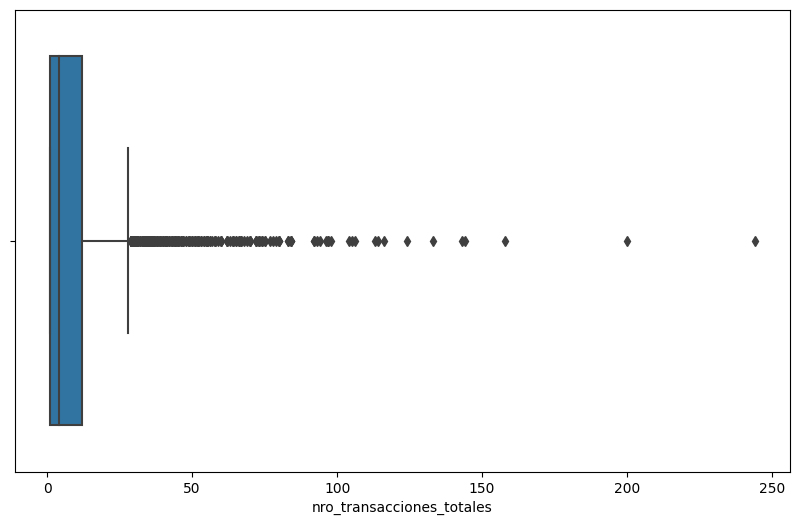

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(agg_transacciones, x='nro_transacciones_totales')
plt.show()

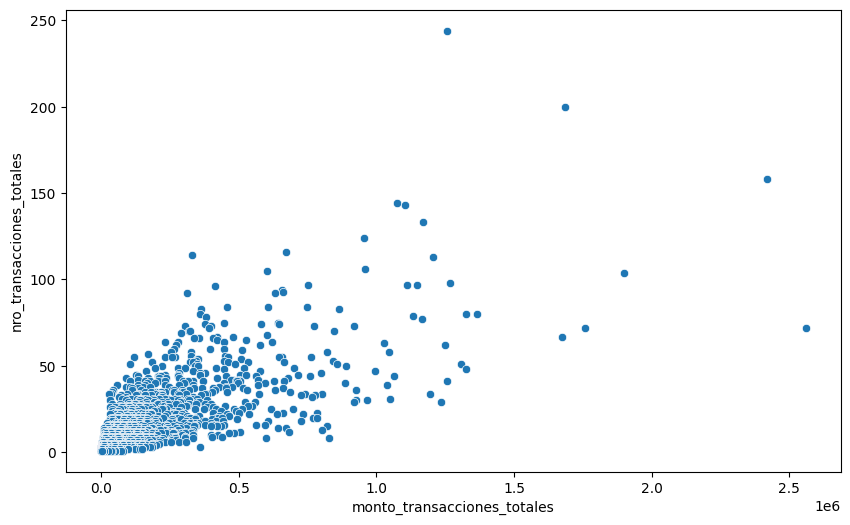

In [176]:
plt.figure(figsize=(10, 6))
sns.scatterplot(agg_transacciones, x='monto_transacciones_totales', y='nro_transacciones_totales');

In [ ]:
# Meses con transacciones
# Monto Promedio Mensual de transacciones
# Dispersión Promedio de las transacciones
# 